In [9]:
import urllib.request
import os
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
filepath = 'titanic3.xls'
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url, filepath)
    print('download :', result)

In [10]:
import numpy 
import pandas as pd
all_df = pd.read_excel(filepath)
all_df[:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
columns = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df = all_df[columns]
all_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [5]:
df = all_df.drop(['name'], axis=1)
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [6]:
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)

fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(age_mean)

df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int)
x_OneHot_df = pd.get_dummies(data = df, columns=['embarked'])
x_OneHot_df[:2]


,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


In [7]:
ndarray = x_OneHot_df.values
ndarray.shape

(1309, 10)

In [8]:
ndarray[:2]

array([[  1.    ,   1.    ,   0.    ,  29.    ,   0.    ,   0.    ,
        211.3375,   0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   1.    ,   0.9167,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ]])

In [9]:
label = ndarray[:,0]
features = ndarray[:,1:]
label[:2]

array([1., 1.])

In [10]:
features[:2]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ]])

In [11]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures = minmax_scale.fit_transform(features)
scaledFeatures[:2]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [12]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

print('Total :', len(all_df),
     'Train :', len(train_df),
     'Test :', len(test_df))

Total : 1309 Train : 1049 Test : 260


### packing

In [12]:
from sklearn import preprocessing

def PreprocessingData(raw_data):
    df = raw_data.drop(['name'], axis=1)
    
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(age_mean)
    
    df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int)
    x_OneHot_df = pd.get_dummies(data = df, columns=['embarked'])
    
    ndarray = x_OneHot_df.values
    label = ndarray[:,0]
    features = ndarray[:,1:]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures = minmax_scale.fit_transform(features)
    
    return scaledFeatures, label


In [13]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

print('Total :', len(all_df),
     'Train :', len(train_df),
     'Test :', len(test_df))

Total : 1309 Train : 1052 Test : 257


In [14]:
train_features, train_label = PreprocessingData(train_df)
test_features, test_label = PreprocessingData(test_df)

### MLP

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(units = 40, input_dim = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 30, input_dim = 40, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
print(model.summary())

ModuleNotFoundError: No module named 'keras'

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

train_history=model.fit(x = train_features,
                       y = train_label,
                       validation_split = 0.1,
                       epochs = 30, batch_size = 30, verbose = 2)

Train on 946 samples, validate on 106 samples
Epoch 1/30
 - 1s - loss: 0.6903 - accuracy: 0.5983 - val_loss: 0.6735 - val_accuracy: 0.8019
Epoch 2/30
 - 0s - loss: 0.6670 - accuracy: 0.6015 - val_loss: 0.5768 - val_accuracy: 0.8019
Epoch 3/30
 - 0s - loss: 0.6149 - accuracy: 0.6533 - val_loss: 0.4752 - val_accuracy: 0.8019
Epoch 4/30
 - 0s - loss: 0.5581 - accuracy: 0.7368 - val_loss: 0.4506 - val_accuracy: 0.7642
Epoch 5/30
 - 0s - loss: 0.5142 - accuracy: 0.7844 - val_loss: 0.4227 - val_accuracy: 0.8113
Epoch 6/30
 - 0s - loss: 0.4944 - accuracy: 0.7791 - val_loss: 0.4154 - val_accuracy: 0.8113
Epoch 7/30
 - 0s - loss: 0.4853 - accuracy: 0.7918 - val_loss: 0.4117 - val_accuracy: 0.8113
Epoch 8/30
 - 0s - loss: 0.4849 - accuracy: 0.7875 - val_loss: 0.4051 - val_accuracy: 0.8208
Epoch 9/30
 - 0s - loss: 0.4770 - accuracy: 0.7907 - val_loss: 0.3987 - val_accuracy: 0.8396
Epoch 10/30
 - 0s - loss: 0.4765 - accuracy: 0.7791 - val_loss: 0.4063 - val_accuracy: 0.8208
Epoch 11/30
 - 0s - los

In [18]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc = 'upper left')
    plt.show()
    
show_train_history(train_history, 'accuracy','val_accuracy')

<Figure size 640x480 with 1 Axes>

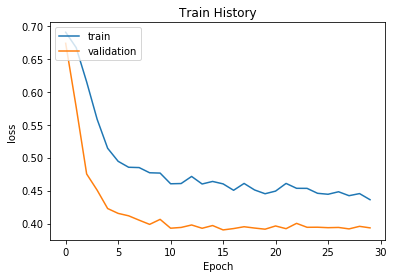

In [19]:
show_train_history(train_history, 'loss','val_loss')

In [20]:
score=model.evaluate(test_features, test_label)
print()
print('accuracy=',score[1])

257/257 [==============================] - 0s 78us/step

accuracy= 0.7821011543273926
